## Building a class `myLinearRegression` that will be a better replica of sklearn module LinearRegression

In [1]:
# I built my own module for Linear Regression
import numpy as np
import matplotlib.pyplot as plt

class myLinearRegression:
    def __init__(self,iterations=1000,learning_rate=0.001):
        self.w_final=None
        self.b_final=None
        self.iterations=iterations
        self.alpha=learning_rate
    def compute_cost(self,x,y,w,b):
        # w is ndarray of size (n,1)
        # b is a scalar
        # x is array of inputs or order m by n
        # m is the no. of observations 
        # n is the number of features
        m,n=x.shape
        cost=0
        for i in range(m):
            f_wb=0
            for j in range(n):
                f_wb+=w[j]*x[i][j]
            f_wb=f_wb+b
            delta=f_wb-y[i]
            cost+=(1/(2*m))*(delta**2)
        return cost

    def compute_gradient(self,x,y,w,b):
        # w is ndarray of size (n,)
        # b is a scalar
        # x is array of inputs or order m by n
        # m is the no. of observations 
        # n is the number of features
        # dj_dw is an array of order (n,)
        m,n=x.shape
        dj_dw=np.zeros(n)
        dj_db=0
        for i in range(m):
            f_wb=0
            for j in range(n):
                f_wb+=w[j]*x[i][j]
            f_wb=f_wb+b
            delta=f_wb-y[i]
            dj_dw+=(1/m)*delta*x[i]
            dj_db+=(1/m)*delta
        return dj_dw,dj_db
    def compute_BGD(self,x,y,w,b,iterations,alpha):
        for j in range(iterations):
            J_hist=[]
            dj_dw,dj_db=self.compute_gradient(x,y,w,b)
            w=w-alpha*dj_dw
            b=b-alpha*dj_db
            J_hist.append(self.compute_cost(x,y,w,b))
        return w,b,J_hist
        
    def fit(self,X,Y):
        self.x_train=X
        self.y_train=Y
        self.w=np.random.uniform(-1,1,(self.x_train.shape[1],))
        self.b=np.random.rand()
        self.w_final,self.b_final,self.J_hist=self.compute_BGD(self.x_train,self.y_train,self.w,self.b,self.iterations,self.alpha)
        
    def predict(self,X=None):
        if self.w_final is None:
            print("The model is not trained on any data")

        if X is None:
            self.predictions=np.dot(self.x_train,self.w_final)+self.b_final
        else:
            self.predictions=np.dot(X,self.w_final)+self.b_final
        return self.predictions

    def plot_visualize(self):
        if self.x_train.shape[1]==1:
            plt.scatter(self.x_train,self.y_train,marker='x',s=7,c='purple')
            plt.plot(self.x_train,self.predictions,linestyle='dotted',color='red',lw=3)
            plt.show()
        else:
            print('A multidimensional regression model cannot be plotted on a 2D plane')
    def get_coeffs(self):
        return self.w_final
    def get_intercept(self):
        return self.b_final


        

Lets test the code !!!

In [2]:
linear_model=myLinearRegression()

## Creating some data for fun

In [3]:
x=np.random.uniform(-10,20,(1000,1))
noise=np.random.uniform(-90,90,(1000,))
y=5*np.square(x[:,0])+noise
y.shape

(1000,)

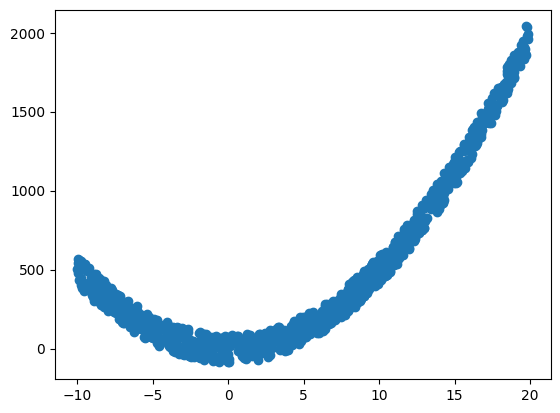

In [4]:
plt.scatter(x,y)

In [5]:
linear_model.fit(x,y)

In [6]:
predictions=linear_model.predict()

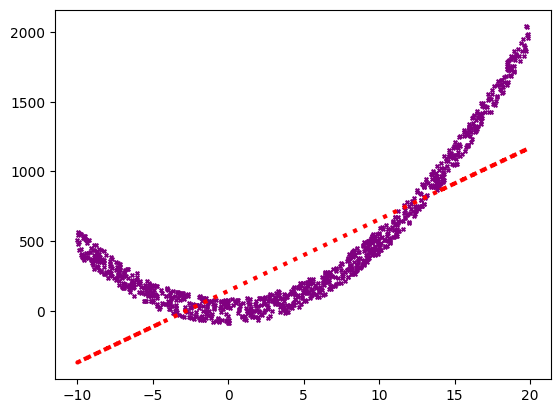

In [7]:
linear_model.plot_visualize()